In [1]:
#Importación de librerías
try:
  
  #Para usar colab
  from google.colab import drive
  drive.mount('/content/drive')
  
  import numpy as np
  import pandas as pd
  
except:
  
  import numpy as np
  import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

import seaborn as sns
sns.set()

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········


In [0]:
#Lectura de datos
try:
  #Caso en que se este usando jupyter notebooks
  data_pulsar = pd.read_csv('HTRU_2_con_header.csv')
except:
  #Caso en que se use colab, cambiar directorio de acuerdo al drive
  dir_str ='drive/My Drive/CURSOS - MAESTRIA/APRENDIZAJE AUTOMÁTICO/MACHINE LEARNING - PROYECTO/ML_PULSAR_CLASSIFICATION_PROJECT/PREPROCESAMIENTO DE DATA/HTRU_2_sin_header.csv'
  #Se definen  los headers
  head = ['mean_IP', 'std_IP','kurt_IP','skew_IP','mean_DM', 'std_DM','kurt_DM','skew_DM','is_pulsar']
  #Lectura de la data
  data_pulsar = pd.read_csv(dir_str,header=None, names=head)

# DIVISION DEL SET DE ENTRENAMIENTO, VALIDACION Y TEST
[texto del enlace](https://)

In [5]:
data_pulsar.head() ##Visualización de los datos

,mean_IP,std_IP,kurt_IP,skew_IP,mean_DM,std_DM,kurt_DM,skew_DM,is_pulsar
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [0]:
from sklearn.model_selection import train_test_split

#Partición de la data cruda
X = data_pulsar.drop(columns=["is_pulsar"])
y = data_pulsar["is_pulsar"]

X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.15, random_state=0) #random_state = 0, para mantener la particion
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2, random_state=0)

# APLICACIÓN SOBRE LA DATA SIN BALANCEO
### Algoritmo: Redes Neuronales por defecto

Error MSE:  0.0939328206139486


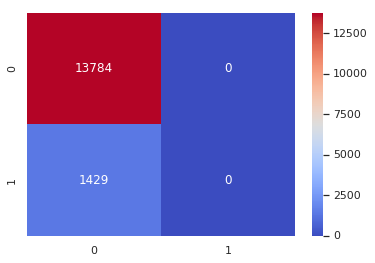

In [7]:
from sklearn.neural_network import MLPClassifier

NN_model = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)

NN_model.fit(X_trainval, y_trainval) 
y_trainval_predict= NN_model.predict(X_trainval)

from sklearn.metrics import mean_squared_error
NN_model_mse = mean_squared_error(y_trainval, y_trainval_predict)  
print("Error MSE: ",NN_model_mse)

from sklearn.metrics import confusion_matrix
NN_model_cm = confusion_matrix(y_trainval, y_trainval_predict)  

sns.heatmap(NN_model_cm,annot=True, fmt="d", cmap="coolwarm");

In [0]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_trainval, y_trainval_predict)
accuracy